1 . 데이터 불러오기(diabetes)

In [ ]:
# 기본 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. 데이터 분석 및 데이터 전처리(data preprocessing)

데이터 특성(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI)열을 살펴보면

0이 존재 하는 걸 알 수 있는데
Pregnancies(임신횟수) 는 0이 이상치 또는 결측치가 될 수는 없다

하지만 혈당(Glucose), 혈압(BloodPressure) , 피부두께(SkinThickness), 인슐린 수치(Insulin), BMI 지수(BMI) 는 생리학적으로 불가능한 수치 이므로 이상치라 판단 할 수 있다.

따라서 0인 값이 있는 행은 제거 또는 0값 대신 그 특성에 대한 평균치로 대체한다.

샘플이 768개로 적기 때문에 관련 행을 삭제하는 것은 데이터의 양이 작아지므로 평균값으로 대채

In [ ]:
# input, target 으로 분리. outcome 을 target 으로 이진 분류 수행
input = data.drop('Outcome',axis=1)
target = data['Outcome']

input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


각 특성의 평균 값으로 0인 값 대체하기(Glucose	BloodPressure	SkinThickness	Insulin	BMI 한정)


In [ ]:
# 대체할 열 리스트
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 0 값을 해당 열의 평균값으로 대체하는 코드
for column in columns_to_replace:
    # 열의 평균값 계산 (0을 제외하고 계산)
    mean_value = input[input[column] != 0][column].mean()

    # 0 값을 평균값으로 대체
    input[column] = input[column].replace(0, mean_value)

# 결과 확인
print(input[columns_to_replace].describe())


          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.435949      12.096346       8.790942   85.021108    6.875151
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.202592      29.153420  155.548223   32.400000
75%    140.250000      80.000000      32.000000  155.548223   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


0 인 값을 각 열에 해당하는 평균값으로 대체하고 데이터셋 확인

In [ ]:
# 전체 입력 특성 재확인 -> 0인 값 사라짐
input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


3. train, test set 분리하기

-1에서 1 사이로 맞춰주는 표준화 과정을 먼저 수행하게 되면 데이터 누수(data leakage) 즉, 전체 데이터의 평균과 표준편차를 사용하게 된다.
 이렇게 하면 test 데이터에 대한 정보가 모델 학습 과정에 반영될 수 있어, 실제 평가 시 모델이 test 데이터를 이미 어느 정도 "알고 있는" 상황이 된다. 이는 모델 성능을 왜곡시킬 수 있게 된다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train, test 분리
train_input,test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

# StandardScaler() 로 데이터들을 -1~+1 사이로 맞춰주기
# train data set에 대해 표준화를 수행하고, test data는 train data에 맞게 변환 되어야한다.
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)

# 결과 확인
print(train_input_scaled[:5])
print(test_input_scaled[:5])
print(train_input_scaled.shape)

[[ 3.31787150e-01 -2.88312576e-01  1.46356416e-01  2.06898799e-03
  -1.59343256e-02 -1.11237390e+00  7.90377825e-01  1.95060602e+00]
 [-8.40686577e-01 -2.21604661e-01 -1.83037829e-01 -1.27014839e-01
  -1.59343256e-02 -7.45558797e-01 -7.97706117e-01 -1.06303733e+00]
 [-1.13380501e+00 -3.21666534e-01  3.11053539e-01  2.06898799e-03
  -1.59343256e-02  1.20124857e-01 -5.80079799e-01 -8.95612704e-01]
 [ 3.31787150e-01 -1.25557734e+00  1.46356416e-01 -7.98498978e-01
  -1.59343256e-02 -5.10797128e-01  2.20200800e+00 -1.42201865e-01]
 [-1.13380501e+00 -9.22037768e-01  1.05219059e+00 -4.62756909e-01
  -1.38038027e+00  7.21701633e-01 -6.71247581e-01 -8.11900388e-01]]
[[-5.47568145e-01 -3.55020491e-01 -5.12432075e-01 -7.98498978e-01
  -1.59343256e-02 -1.09770130e+00 -4.94793809e-01 -8.11900388e-01]
 [-8.40686577e-01 -1.45570109e+00  6.40447785e-01 -4.62756909e-01
  -1.36896692e+00 -1.03901088e+00  3.16893539e-01 -9.79325019e-01]
 [ 1.21114244e+00  3.45412616e-01 -1.83407066e-02  2.06898799e-03
  

In [ ]:
train_target.shape

(614,)

4. 딥러닝 모델(밀집 신경망)로 이진 분류 수행하기

In [ ]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 이진 분류 모델이므로 손실함수는 binary_crossentropy 사용
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

훈련 수행

In [ ]:
history = model.fit(train_input_scaled,train_target, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6048 - loss: 0.6568 - val_accuracy: 0.7581 - val_loss: 0.5745
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.5958 - val_accuracy: 0.7581 - val_loss: 0.5238
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6945 - loss: 0.5480 - val_accuracy: 0.7581 - val_loss: 0.4936
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.5065 - val_accuracy: 0.7581 - val_loss: 0.4823
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.4862 - val_accuracy: 0.7903 - val_loss: 0.4819
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.4864 - val_accuracy: 0.7581 - val_loss: 0.4631
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7539 - loss: 0.4667 - val_accuracy: 0.7581 - val_loss: 0.4676
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.4608 - val_accuracy: 0.7581 - 

train and test loss 시각화 하기

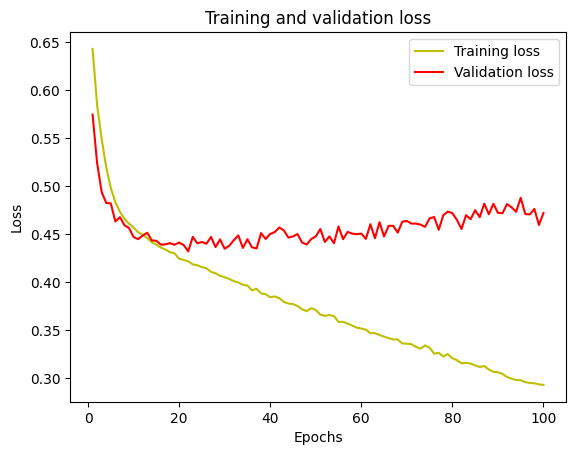

In [ ]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train test accuracy 시각화

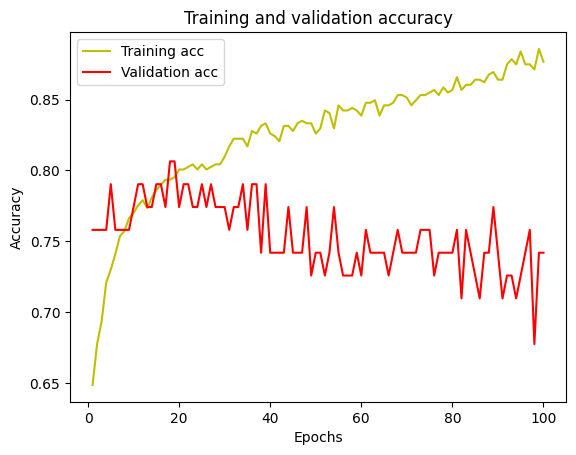

In [ ]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_input_scaled,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4401 


[0.4675852358341217, 0.7922077775001526]

5. 딥러닝 모델 미세 조정 해보기

100 epoch 돌려본결과 거의 30 epoch 부터 과대적합이 나타나기 시작함 -> 모델이 너무 복잡한거 같아 복잡도를 조금 낮추고 드롭아웃 층을 추가하여 훈련

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

조기 종료 사용시 fit 메서드에 callback=[early_stopping] prameter 추가

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history2 = model.fit(train_input_scaled,train_target, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6061 - loss: 0.6624 - val_accuracy: 0.7419 - val_loss: 0.5858
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.6153 - val_accuracy: 0.7258 - val_loss: 0.5336
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6308 - loss: 0.6012 - val_accuracy: 0.7581 - val_loss: 0.4964
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.5575 - val_accuracy: 0.8387 - val_loss: 0.4725
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.5191 - val_accuracy: 0.7903 - val_loss: 0.4601
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7509 - loss: 0.5013 - val_accuracy: 0.7742 - val_loss: 0.4460
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.5043 - val_accuracy: 0.8065 - val_loss: 0.4406
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.4812 - val_accuracy: 0.8065 - 

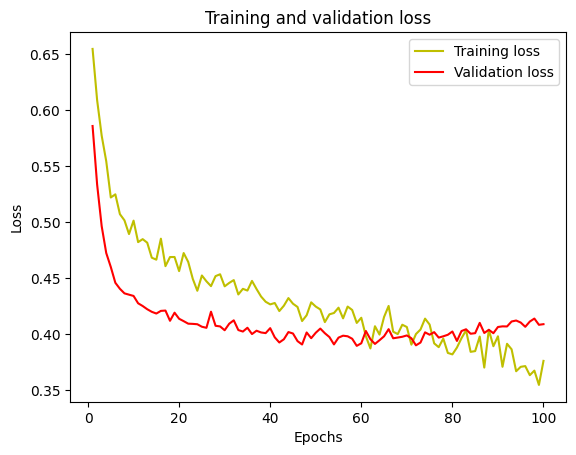

In [ ]:
loss =history2.history['loss']
val_loss =history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

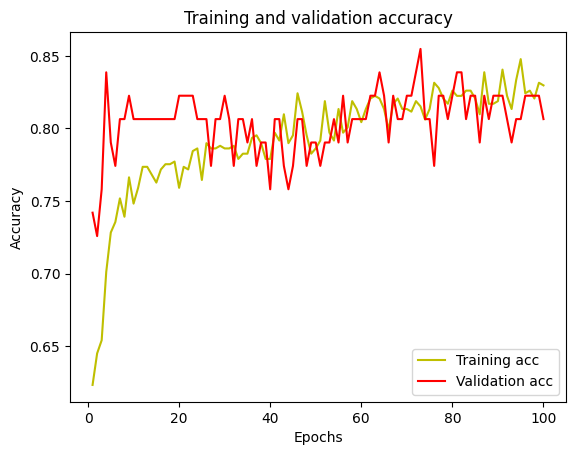

In [ ]:
acc =history2.history['accuracy']
val_acc =history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_input_scaled,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4714 


[0.46703022718429565, 0.7857142686843872]

confusion matrix로 결과 확인하기

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(test_input_scaled)

print(classification_report(test_target,pred.round()))
print(confusion_matrix(test_target,pred.round()))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.61      0.70      0.65        44

    accuracy                           0.79       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.80      0.79      0.79       154

[[90 20]
 [13 31]]


6.  PCA 사용해서 학습해보기

In [ ]:
from sklearn.decomposition import PCA

# 2. PCA 적용 (train 데이터로만 fit, 주성분 2개)
pca = PCA(n_components=2)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)
# 4. 결과 확인
print("주성분 분석 결과 (PC1, PC2):\n", train_input_pca[:5])

# 각 주성분이 설명하는 분산 비율
print("설명된 분산 비율:", pca.explained_variance_ratio_)

주성분 분석 결과 (PC1, PC2):
 [[ 0.49473568  1.42312613]
 [-1.29677762 -0.37656137]
 [-0.76036299 -0.82714011]
 [-0.63654129  0.02375771]
 [-1.08986694 -0.39809856]]
설명된 분산 비율: [0.28730875 0.18771503]


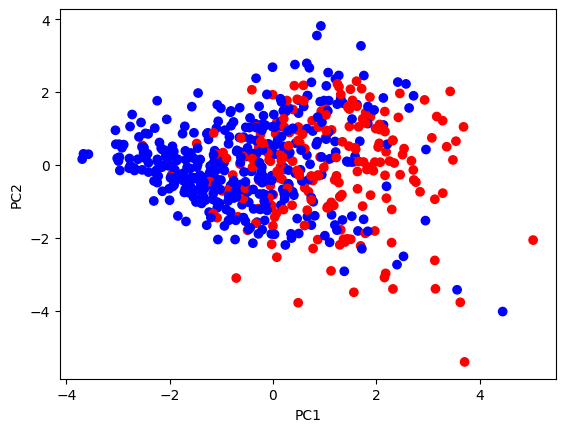

In [ ]:
plt.scatter(train_input_pca[:,0],train_input_pca[:,1],c=train_target,cmap='bwr')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

모델 정의(함수화)

In [ ]:
# 모델 함수화
def model_fn(input_shape):
    model = Sequential()
    model.add(Dense(16,input_shape=input_shape,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [ ]:
model_pca2 = model_fn((2,))
model_pca2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_pca2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,137 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pca2_history = model_pca2.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6959 - loss: 0.6591 - val_accuracy: 0.7727 - val_loss: 0.6062
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7410 - loss: 0.6034 - val_accuracy: 0.7597 - val_loss: 0.5532
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7353 - loss: 0.5577 - val_accuracy: 0.7597 - val_loss: 0.5080
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7234 - loss: 0.5344 - val_accuracy: 0.7338 - val_loss: 0.4886
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7272 - loss: 0.5354 - val_accuracy: 0.7208 - val_loss: 0.4799
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7331 - loss: 0.5108 - val_accuracy: 0.7143 - val_loss: 0.4821
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7339 - loss: 0.5269 - val_accuracy: 0.7208 - val_loss: 0.4822
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7257 - loss: 0.5087 - val_accuracy: 0.7208 - val_loss

In [ ]:
model_pca2.evaluate(test_input_pca,test_target)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7381 - loss: 0.4624 


[0.4831012785434723, 0.7142857313156128]

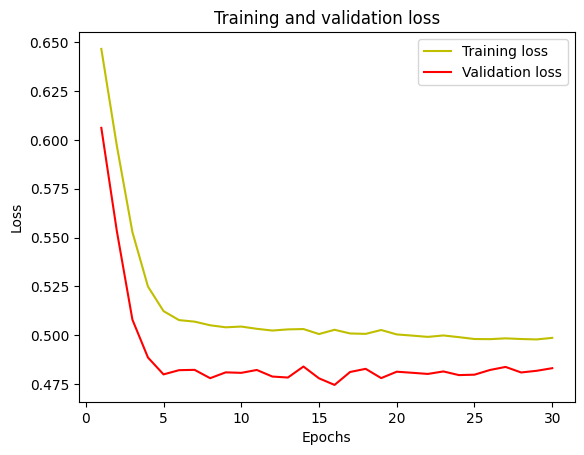

In [ ]:
loss =pca2_history.history['loss']
val_loss =pca2_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

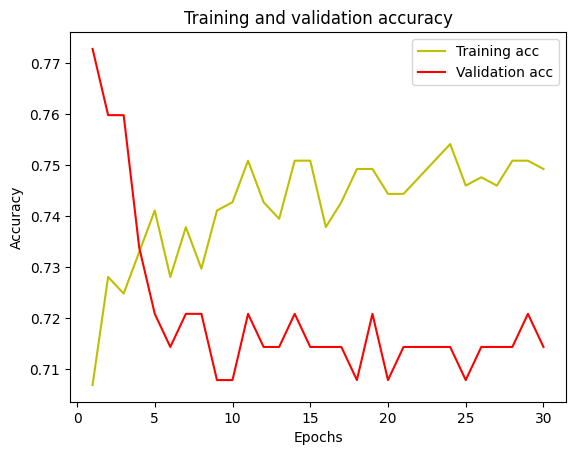

In [ ]:
acc =pca2_history.history['accuracy']
val_acc =pca2_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

PCA n=3 일때 수행

주성분 분석 결과 (PC1, PC2,PC3):
 [[ 0.49473568  1.42312613  0.57510137]
 [-1.29677762 -0.37656137  0.03547889]
 [-0.76036299 -0.82714011 -0.44886281]
 [-0.63654129  0.02375771  0.50465707]
 [-1.08986694 -0.39809856 -1.77816878]]


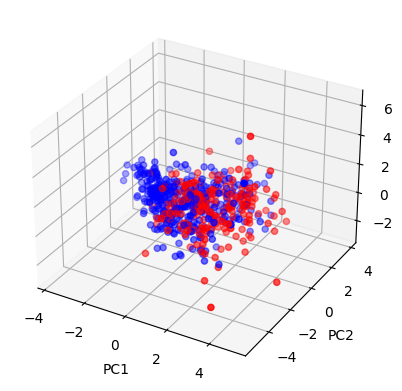

(614, 3)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 2. PCA 적용 (train 데이터로만 fit, 주성분 3개)
pca = PCA(n_components=3)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_input_pca[:,0],train_input_pca[:,1],train_input_pca[:,2],c=train_target,cmap='bwr')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

print(train_input_pca.shape)

In [ ]:
# 모델 학습
pca3_model = model_fn((3,))
pca3_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca3_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 16)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pca3_history = pca3_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6124 - loss: 0.6822 - val_accuracy: 0.7468 - val_loss: 0.6233
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7268 - loss: 0.6135 - val_accuracy: 0.7662 - val_loss: 0.5624
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7196 - loss: 0.5710 - val_accuracy: 0.7857 - val_loss: 0.5149
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.5369 - val_accuracy: 0.7792 - val_loss: 0.4795
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7477 - loss: 0.5138 - val_accuracy: 0.7792 - val_loss: 0.4629
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.4990 - val_accuracy: 0.7792 - val_loss: 0.4589
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7445 - loss: 0.4970 - val_accuracy: 0.7792 - val_loss: 0.4535
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7336 - loss: 0.5291 - val_accuracy: 0.7727 - val_loss

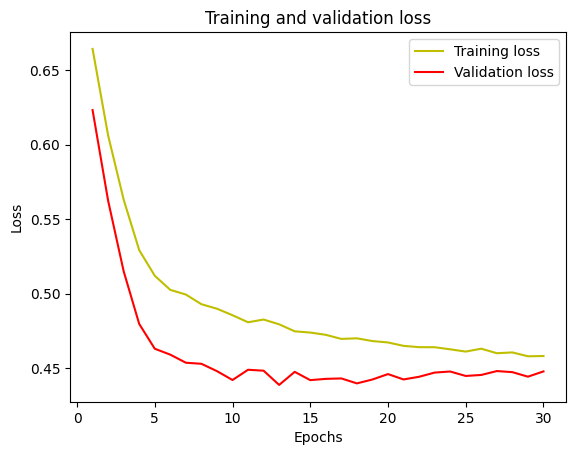

In [ ]:
loss =pca3_history.history['loss']
val_loss =pca3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

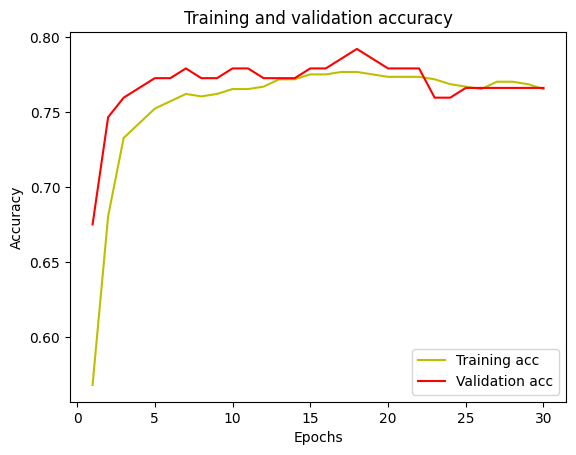

In [ ]:
acc =pca3_history.history['accuracy']
val_acc =pca3_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pca3_model.evaluate(test_input_pca,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7710 - loss: 0.4409 


[0.44764700531959534, 0.7597402334213257]

PCA 2 일때 test 0.72, 3일때 0.77 달성

PCA 5일 때 해보기 -> 0.81 달성

In [ ]:
# 1. PCA 적용 (train 데이터로만 fit, 주성분 5개)
pca = PCA(n_components=5)
train_input_pca = pca.fit_transform(train_input_scaled)

# 2. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])
print(train_input_pca.shape)

주성분 분석 결과 (PC1, PC2,PC3):
 [[ 0.49473568  1.42312613  0.57510137  1.12280999 -0.10729948]
 [-1.29677762 -0.37656137  0.03547889 -0.92057547  0.29723758]
 [-0.76036299 -0.82714011 -0.44886281 -0.79979097  0.69384952]
 [-0.63654129  0.02375771  0.50465707  2.25664594  0.33459268]
 [-1.08986694 -0.39809856 -1.77816878 -0.29356625  1.46387713]]
(614, 5)


In [ ]:
pca5_model = model_fn((5,))
pca5_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca5_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pca5_history = pca5_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3363 - loss: 0.7350 - val_accuracy: 0.5714 - val_loss: 0.6910
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6357 - loss: 0.6775 - val_accuracy: 0.7403 - val_loss: 0.6547
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7220 - loss: 0.6430 - val_accuracy: 0.7532 - val_loss: 0.6229
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.6166 - val_accuracy: 0.7597 - val_loss: 0.5859
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5778 - val_accuracy: 0.7597 - val_loss: 0.5407
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.5329 - val_accuracy: 0.7727 - val_loss: 0.5121
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.5489 - val_accuracy: 0.7597 - val_loss: 0.4935
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7733 - loss: 0.4886 - val_accuracy: 0.7662 - val_loss

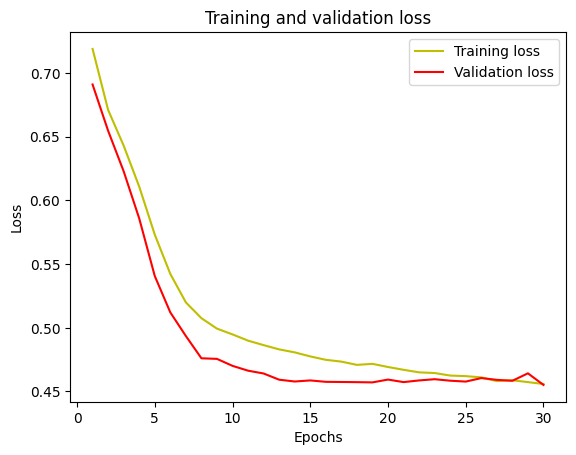

In [ ]:
loss =pca5_history.history['loss']
val_loss =pca5_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

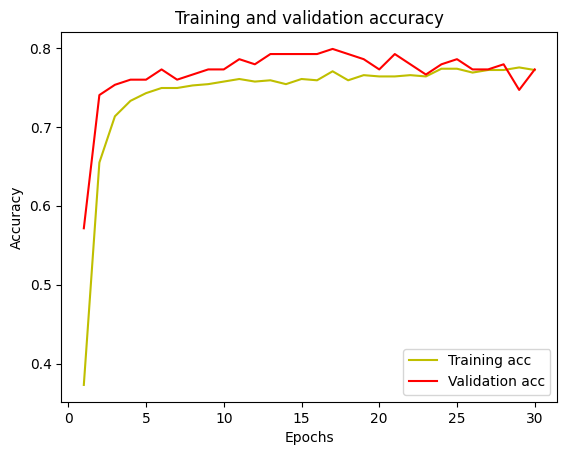

In [ ]:
acc =pca5_history.history['accuracy']
val_acc =pca5_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pca5_model.evaluate(test_input_pca,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4419 


[0.45513880252838135, 0.7727272510528564]